In [1]:
#Lets import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

In [3]:
#Lets first read the dataset
dataset_original = pd.read_csv("Turnstile_Usage_Data__2022_20240118.csv", index_col=1)
dataset_original

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
Unit,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,03:00:00,REGULAR,7811029,2770909
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,07:00:00,REGULAR,7811032,2770930
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,11:00:00,REGULAR,7811067,2771080
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,15:00:00,REGULAR,7811217,2771126
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,19:00:00,REGULAR,7811477,2771174
...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,00:00:00,REGULAR,5562,1001
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,04:00:00,REGULAR,5562,1001
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,08:00:00,REGULAR,5562,1001


In [5]:
dataset_original.info()
dataset_original.columns
#date and time column is a string. I can't use it as it is as I intend to group stations and their busy periods in monthly periods. Also Exit column is faulty

<class 'pandas.core.frame.DataFrame'>
Index: 10963251 entries, R051 to R469
Data columns (total 10 columns):
 #   Column                                                      Dtype 
---  ------                                                      ----- 
 0   C/A                                                         object
 1   SCP                                                         object
 2   Station                                                     object
 3   Line Name                                                   object
 4   Division                                                    object
 5   Date                                                        object
 6   Time                                                        object
 7   Description                                                 object
 8   Entries                                                     int64 
 9   Exits                                                       int64 
dtypes: int64(2), object(8)

Index(['C/A', 'SCP', 'Station', 'Line Name', 'Division', 'Date', 'Time',
       'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [7]:
#In the original dataset, Exit column format is wrong there we renamed it first.
dataset_original.rename(columns={'Exits                                                     ': 'Exits'}, inplace=True)
dataset_original.columns

Index(['C/A', 'SCP', 'Station', 'Line Name', 'Division', 'Date', 'Time',
       'Description', 'Entries', 'Exits'],
      dtype='object')

In [9]:
#There is no one null value in any column.
dataset_original.isnull().sum()

C/A            0
SCP            0
Station        0
Line Name      0
Division       0
Date           0
Time           0
Description    0
Entries        0
Exits          0
dtype: int64

In [11]:
dataset_original['Exits'] = dataset_original['Exits'].round().astype(int)
dataset_original

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
Unit,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,03:00:00,REGULAR,7811029,2770909
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,07:00:00,REGULAR,7811032,2770930
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,11:00:00,REGULAR,7811067,2771080
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,15:00:00,REGULAR,7811217,2771126
R051,A002,02-00-00,59 ST,NQR456W,BMT,12/30/2022,19:00:00,REGULAR,7811477,2771174
...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,00:00:00,REGULAR,5562,1001
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,04:00:00,REGULAR,5562,1001
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2022,08:00:00,REGULAR,5562,1001


In [13]:
#Changing the datetime and hour column from string to datetime as well as adding hour column
dataset_original['Date'] = pd.to_datetime(dataset_original['Date'], format='mixed')
dataset_original['Time'] = pd.to_datetime(dataset_original['Time'], format='%H:%M:%S')
dataset_original['Hour'] = dataset_original['Time'].dt.hour
dataset_original.columns
dataset_original

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour
Unit,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 03:00:00,REGULAR,7811029,2770909,3
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 07:00:00,REGULAR,7811032,2770930,7
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 11:00:00,REGULAR,7811067,2771080,11
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 15:00:00,REGULAR,7811217,2771126,15
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 19:00:00,REGULAR,7811477,2771174,19
...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 00:00:00,REGULAR,5562,1001,0
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 04:00:00,REGULAR,5562,1001,4
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 08:00:00,REGULAR,5562,1001,8


In [15]:
#We have no duplicate data.
dataset_original[dataset_original.duplicated()]

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour
Unit,,,,,,,,,,,


In [17]:
#I added entries and exits together to find out a total traffic information.
dataset_org_traffic = dataset_original.copy()
dataset_org_traffic['Total Traffic'] = np.abs(dataset_original['Entries'] - dataset_original['Exits'])
dataset_org_traffic

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 03:00:00,REGULAR,7811029,2770909,3,5040120
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 07:00:00,REGULAR,7811032,2770930,7,5040102
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 11:00:00,REGULAR,7811067,2771080,11,5039987
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 15:00:00,REGULAR,7811217,2771126,15,5040091
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 19:00:00,REGULAR,7811477,2771174,19,5040303
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 00:00:00,REGULAR,5562,1001,0,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 04:00:00,REGULAR,5562,1001,4,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 08:00:00,REGULAR,5562,1001,8,4561


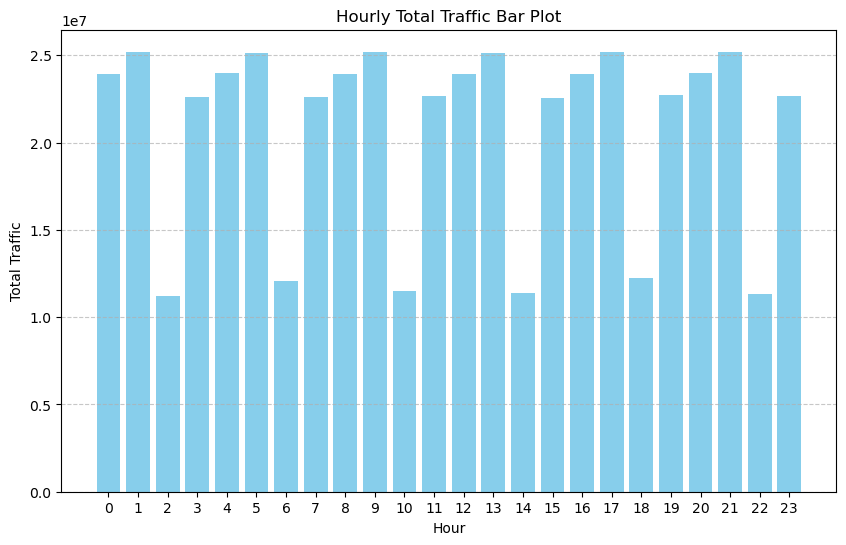

In [19]:
#NYC rush hour is 7-10 AM and 5-8 PM. I want to focus 5-8 PM more.
hourly_traffic_plot = dataset_org_traffic.groupby('Hour')['Total Traffic'].mean().reset_index()
hourly_traffic_plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_traffic_plot['Hour'], hourly_traffic_plot['Total Traffic'], color='skyblue')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Total Traffic')
plt.title('Hourly Total Traffic Bar Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#People wouldn't be interested in being informed about the event before noon. We also observed there is no significant change in busyness outside of rush hours

In [21]:
dataset_org_traffic

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 03:00:00,REGULAR,7811029,2770909,3,5040120
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 07:00:00,REGULAR,7811032,2770930,7,5040102
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 11:00:00,REGULAR,7811067,2771080,11,5039987
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 15:00:00,REGULAR,7811217,2771126,15,5040091
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 19:00:00,REGULAR,7811477,2771174,19,5040303
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 00:00:00,REGULAR,5562,1001,0,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 04:00:00,REGULAR,5562,1001,4,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 08:00:00,REGULAR,5562,1001,8,4561


In [23]:
#I want to get how many different description values are there and clean if not necessary
dataset_org_traffic["Description"].unique()
desc_info = dataset_org_traffic['Description'].value_counts()
desc_info
#Few data for Recovr Aud, these are not regular train but are recovery trains not sutiable for our aim.

Description
REGULAR       10905897
RECOVR AUD       57354
Name: count, dtype: int64

In [25]:
#I will delete "Recovr Aud" columns as they are not regular lines and are exceptions or special occasions. For our aim using Regular lines is better.
dataset_org_trf_desc = dataset_org_traffic[dataset_org_traffic['Description'] != "RECOVR AUD"]
dataset_org_trf_desc

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 03:00:00,REGULAR,7811029,2770909,3,5040120
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 07:00:00,REGULAR,7811032,2770930,7,5040102
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 11:00:00,REGULAR,7811067,2771080,11,5039987
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 15:00:00,REGULAR,7811217,2771126,15,5040091
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-12-30,1900-01-01 19:00:00,REGULAR,7811477,2771174,19,5040303
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 00:00:00,REGULAR,5562,1001,0,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 04:00:00,REGULAR,5562,1001,4,4561
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-01-01,1900-01-01 08:00:00,REGULAR,5562,1001,8,4561


In [27]:
#Since the gala is planned to be in the beginning of Summer (beginning of June), I take May-June-July data only
filtered_dts_org_trf_desc = dataset_org_trf_desc[(dataset_org_trf_desc['Date'].dt.month.isin([5, 6, 7]))]
filtered_dts_org_trf_desc

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,7744051,2729581,0,5014470
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,7744056,2729582,4,5014474
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,7744060,2729593,8,5014467
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,7744078,2729638,12,5014440
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,7744137,2729686,16,5014451
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 07:22:25,REGULAR,0,219,7,219
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 09:00:00,REGULAR,0,220,9,220
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 13:00:00,REGULAR,0,221,13,221


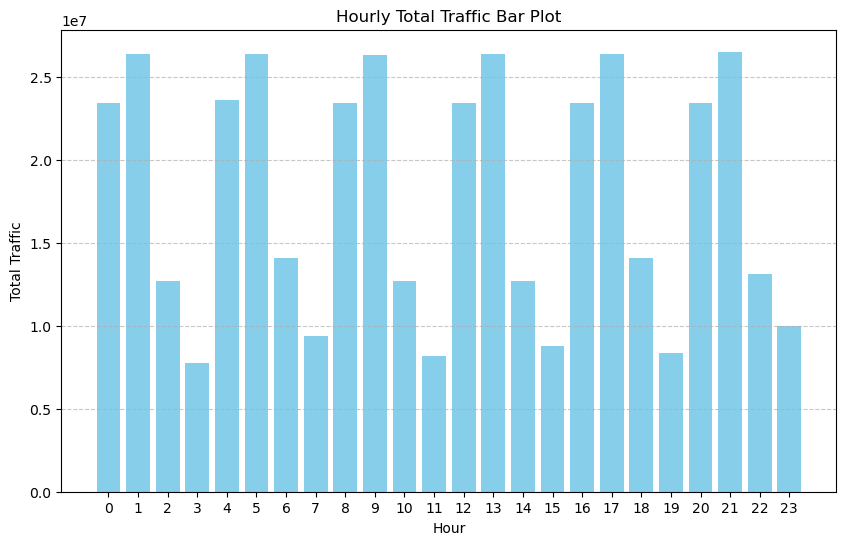

In [29]:
hourly_traffic_smr = filtered_dts_org_trf_desc.groupby('Hour')['Total Traffic'].mean().reset_index()
hourly_traffic_smr
plt.figure(figsize=(10, 6))
plt.bar(hourly_traffic_smr['Hour'], hourly_traffic_smr['Total Traffic'], color='skyblue')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.ylabel('Total Traffic')
plt.title('Hourly Total Traffic Bar Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#no drastic change after filtering with months. We will continue from here.

In [31]:
filtered_dts_org_trf_desc

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,7744051,2729581,0,5014470
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,7744056,2729582,4,5014474
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,7744060,2729593,8,5014467
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,7744078,2729638,12,5014440
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,7744137,2729686,16,5014451
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 07:22:25,REGULAR,0,219,7,219
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 09:00:00,REGULAR,0,220,9,220
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 13:00:00,REGULAR,0,221,13,221


In [33]:
busiest_stations = filtered_dts_org_trf_desc.groupby('Station')['Total Traffic'].sum().reset_index()
top_10_stations = busiest_stations.sort_values(by='Total Traffic', ascending=False).head(10)
top_10_stations
#contains information on top ten busiest stations and their traffic.

,Station,Total Traffic
226,FULTON ST,2776752466837
353,TIMES SQ-42 ST,2119189607511
68,42 ST-PORT AUTH,2090444507614
211,ELMHURST AV,1901200170552
9,125 ST,1893688076404
250,JACKSON AV,1706839274514
173,CANAL ST,1392645989483
57,33 ST,1254025638632
21,161/YANKEE STAD,1215877565167
199,DEKALB AV,1204284418029


In [35]:
filtered_dts_org_trf_desc

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,7744051,2729581,0,5014470
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,7744056,2729582,4,5014474
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,7744060,2729593,8,5014467
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,7744078,2729638,12,5014440
R051,A002,02-00-00,59 ST,NQR456W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,7744137,2729686,16,5014451
...,...,...,...,...,...,...,...,...,...,...,...,...
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 07:22:25,REGULAR,0,219,7,219
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 09:00:00,REGULAR,0,220,9,220
R469,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,2022-05-01,1900-01-01 13:00:00,REGULAR,0,221,13,221


In [37]:
# Filter 'filtered_dts_org_trf_desc' based on 'Station' values in 'top_10_stations'
max_trf_stn_trf_desc = filtered_dts_org_trf_desc[filtered_dts_org_trf_desc['Station'].isin(top_10_stations['Station'])]
max_trf_stn_trf_desc
# Our ultimate input variable

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic
Unit,,,,,,,,,,,,
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185
...,...,...,...,...,...,...,...,...,...,...,...,...
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576


In [49]:
#I added a new column to figure out which days of the week have more traffic among the stations with the most overall traffic in 3 months
max_trf_stn_trf_desc_day = max_trf_stn_trf_desc.copy()
max_trf_stn_trf_desc_day['Day'] = max_trf_stn_trf_desc_day['Date'].dt.day_name()
max_trf_stn_trf_desc_day

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic,Day
Unit,,,,,,,,,,,,,
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548,Sunday
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561,Sunday
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576,Sunday


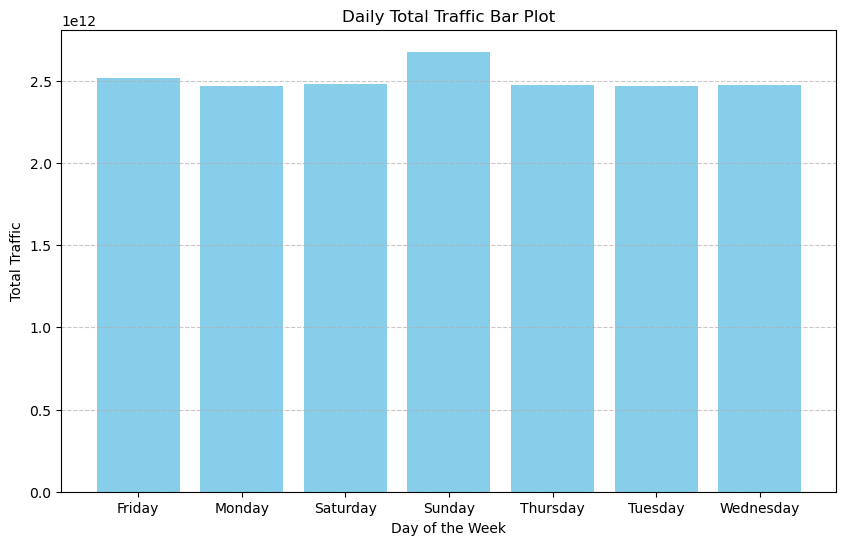

In [73]:
daily_traffic_plot = max_trf_stn_trf_desc_day.groupby('Day')['Total Traffic'].sum().reset_index()
daily_traffic_plot
plt.figure(figsize=(10, 6))
plt.bar(daily_traffic_plot['Day'], daily_traffic_plot['Total Traffic'], color='skyblue')
plt.xlabel('Day of the Week')
plt.xticks(range(7))
plt.ylabel('Total Traffic')
plt.title('Daily Total Traffic Bar Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Sunday's traffic is significantly higher. People will be more likely to listen due to weekend at Fri-Sat-Sun 16:00-18:00 and 20:00-22:00. 

In [75]:
#to map borough info
stn_borough_info = pd.read_csv("MTA_Subway_Stations.csv", index_col=1)
stn_borough_info

,GTFS Stop ID,Complex ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
Station ID,,,,,,,,,,,,,,,,,
70,B23,70,BMT,West End,Bay 50 St,Bk,D,Elevated,40.588841,-73.983765,Manhattan,Coney Island,0,0,0,NaN,POINT (-73.983765 40.588841)
365,607,365,IRT,Pelham,Castle Hill Av,Bx,6,Elevated,40.834255,-73.851222,Pelham Bay,Manhattan,0,0,0,NaN,POINT (-73.851222 40.834255)
139,S01,627,BMT,Franklin Shuttle,Franklin Av,Bk,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,NaN,POINT (-73.955827 40.680596)
102,M18,625,BMT,Jamaica,Delancey St-Essex St,M,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,0,0,0,NaN,POINT (-73.987437 40.718315)
505,S27,505,SIR,Staten Island,Grasmere,SI,SIR,Open Cut,40.603117,-74.084087,Ferry,South Shore,0,0,0,NaN,POINT (-74.084087 40.603117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,B06,222,IND,63rd St,Roosevelt Island,M,F,Subway,40.759145,-73.953260,Queens,Downtown,1,1,1,NaN,POINT (-73.95326 40.759145)
454,710,616,IRT,Flushing,74 St-Broadway,Q,7,Elevated,40.746848,-73.891394,Outbound,Manhattan,1,1,1,NaN,POINT (-73.891394 40.746848)
364,606,364,IRT,Pelham,Zerega Av,Bx,6,Elevated,40.836488,-73.847036,Pelham Bay,Manhattan,0,0,0,NaN,POINT (-73.847036 40.836488)


In [77]:
#so that I can join this dataset with my original one, I have made some changes in columns
stn_borough_info_upd = stn_borough_info.copy()
stn_borough_info_upd['Stop Name'] = stn_borough_info_upd['Stop Name'].str.upper()
stn_borough_info_upd['Line'] = stn_borough_info_upd['Line'].str.upper()
stn_borough_info_upd

,GTFS Stop ID,Complex ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
Station ID,,,,,,,,,,,,,,,,,
70,B23,70,BMT,WEST END,BAY 50 ST,Bk,D,Elevated,40.588841,-73.983765,Manhattan,Coney Island,0,0,0,NaN,POINT (-73.983765 40.588841)
365,607,365,IRT,PELHAM,CASTLE HILL AV,Bx,6,Elevated,40.834255,-73.851222,Pelham Bay,Manhattan,0,0,0,NaN,POINT (-73.851222 40.834255)
139,S01,627,BMT,FRANKLIN SHUTTLE,FRANKLIN AV,Bk,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,NaN,POINT (-73.955827 40.680596)
102,M18,625,BMT,JAMAICA,DELANCEY ST-ESSEX ST,M,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,0,0,0,NaN,POINT (-73.987437 40.718315)
505,S27,505,SIR,STATEN ISLAND,GRASMERE,SI,SIR,Open Cut,40.603117,-74.084087,Ferry,South Shore,0,0,0,NaN,POINT (-74.084087 40.603117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,B06,222,IND,63RD ST,ROOSEVELT ISLAND,M,F,Subway,40.759145,-73.953260,Queens,Downtown,1,1,1,NaN,POINT (-73.95326 40.759145)
454,710,616,IRT,FLUSHING,74 ST-BROADWAY,Q,7,Elevated,40.746848,-73.891394,Outbound,Manhattan,1,1,1,NaN,POINT (-73.891394 40.746848)
364,606,364,IRT,PELHAM,ZEREGA AV,Bx,6,Elevated,40.836488,-73.847036,Pelham Bay,Manhattan,0,0,0,NaN,POINT (-73.847036 40.836488)


In [79]:
#Lets get rid of unnecessary columns
stn_borough_info_filtered = stn_borough_info_upd.drop(columns=['ADA Notes','ADA','ADA Northbound','ADA Southbound'])
stn_borough_info_filtered

,GTFS Stop ID,Complex ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,Georeference
Station ID,,,,,,,,,,,,,
70,B23,70,BMT,WEST END,BAY 50 ST,Bk,D,Elevated,40.588841,-73.983765,Manhattan,Coney Island,POINT (-73.983765 40.588841)
365,607,365,IRT,PELHAM,CASTLE HILL AV,Bx,6,Elevated,40.834255,-73.851222,Pelham Bay,Manhattan,POINT (-73.851222 40.834255)
139,S01,627,BMT,FRANKLIN SHUTTLE,FRANKLIN AV,Bk,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,POINT (-73.955827 40.680596)
102,M18,625,BMT,JAMAICA,DELANCEY ST-ESSEX ST,M,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,POINT (-73.987437 40.718315)
505,S27,505,SIR,STATEN ISLAND,GRASMERE,SI,SIR,Open Cut,40.603117,-74.084087,Ferry,South Shore,POINT (-74.084087 40.603117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,B06,222,IND,63RD ST,ROOSEVELT ISLAND,M,F,Subway,40.759145,-73.953260,Queens,Downtown,POINT (-73.95326 40.759145)
454,710,616,IRT,FLUSHING,74 ST-BROADWAY,Q,7,Elevated,40.746848,-73.891394,Outbound,Manhattan,POINT (-73.891394 40.746848)
364,606,364,IRT,PELHAM,ZEREGA AV,Bx,6,Elevated,40.836488,-73.847036,Pelham Bay,Manhattan,POINT (-73.847036 40.836488)


In [81]:
max_trf_stn_trf_desc_day

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic,Day
Unit,,,,,,,,,,,,,
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839,Sunday
R032,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548,Sunday
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561,Sunday
R405,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576,Sunday


In [83]:
#I will remove duplicates and change umatching values with matching ones
distinct_stations_brg = stn_borough_info_filtered[['Stop Name', 'Borough']].drop_duplicates()
distinct_stations_brg['Borough'] = distinct_stations_brg['Borough'].str.upper()
distinct_stations_brg.loc[distinct_stations_brg['Stop Name'].str.strip() == '161 ST-YANKEE STADIUM', 'Stop Name'] = '161/YANKEE STAD'
distinct_stations_brg.loc[distinct_stations_brg['Stop Name'].str.strip() == '34 ST-PENN STATION', 'Stop Name'] = '34 ST-PENN STA'
distinct_stations_brg.loc[distinct_stations_brg['Stop Name'].str.strip() == '42 ST-PORT AUTHORITY BUS TERMINAL', 'Stop Name'] = '42 ST-PORT AUTH'
distinct_stations_brg

,Stop Name,Borough
Station ID,,
70,BAY 50 ST,BK
365,CASTLE HILL AV,BX
139,FRANKLIN AV,BK
102,DELANCEY ST-ESSEX ST,M
505,GRASMERE,SI
...,...,...
222,ROOSEVELT ISLAND,M
454,74 ST-BROADWAY,Q
364,ZEREGA AV,BX


In [85]:
#I left join borough information with my input variable with total traffic info. To avoid ummatching issue, I force values to be upper case
max_trf_stn_trf_desc_join = pd.merge(max_trf_stn_trf_desc_day, distinct_stations_brg, left_on='Station', right_on='Stop Name', how='left')
max_trf_stn_trf_desc_join['Borough'] = max_trf_stn_trf_desc_join['Borough'].str.upper()
max_trf_stn_trf_desc_join

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic,Day,Stop Name,Borough
0,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561,Sunday,TIMES SQ-42 ST,M
1,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579,Sunday,TIMES SQ-42 ST,M
2,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620,Sunday,TIMES SQ-42 ST,M
3,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839,Sunday,TIMES SQ-42 ST,M
4,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185,Sunday,TIMES SQ-42 ST,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274619,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548,Sunday,JACKSON AV,BX
274620,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561,Sunday,JACKSON AV,BX
274621,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576,Sunday,JACKSON AV,BX
274622,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 17:00:00,REGULAR,955565,312985,17,642580,Sunday,JACKSON AV,BX


In [93]:
max_trf_stn_trf_desc_join.loc[max_trf_stn_trf_desc_join['Borough'].str.strip() == 'M', 'Borough'] = 'MANHATTAN'
max_trf_stn_trf_desc_join.loc[max_trf_stn_trf_desc_join['Borough'].str.strip() == 'BK', 'Borough'] = 'BROOKLYN'
max_trf_stn_trf_desc_join.loc[max_trf_stn_trf_desc_join['Borough'].str.strip() == 'BX', 'Borough'] = 'BRONX'
max_trf_stn_trf_desc_join.loc[max_trf_stn_trf_desc_join['Borough'].str.strip() == 'Q', 'Borough'] = 'QUEENS'
max_trf_stn_trf_desc_join

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic,Day,Stop Name,Borough
0,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561,Sunday,TIMES SQ-42 ST,MANHATTAN
1,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579,Sunday,TIMES SQ-42 ST,MANHATTAN
2,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620,Sunday,TIMES SQ-42 ST,MANHATTAN
3,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839,Sunday,TIMES SQ-42 ST,MANHATTAN
4,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185,Sunday,TIMES SQ-42 ST,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274619,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548,Sunday,JACKSON AV,BRONX
274620,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561,Sunday,JACKSON AV,BRONX
274621,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576,Sunday,JACKSON AV,BRONX
274622,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 17:00:00,REGULAR,955565,312985,17,642580,Sunday,JACKSON AV,BRONX


In [95]:
max_trf_stn_trf_desc_join

,C/A,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Hour,Total Traffic,Day,Stop Name,Borough
0,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 00:00:00,REGULAR,10444022,13503583,0,3059561,Sunday,TIMES SQ-42 ST,MANHATTAN
1,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 04:00:00,REGULAR,10444058,13503637,4,3059579,Sunday,TIMES SQ-42 ST,MANHATTAN
2,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 08:00:00,REGULAR,10444081,13503701,8,3059620,Sunday,TIMES SQ-42 ST,MANHATTAN
3,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 12:00:00,REGULAR,10444182,13504021,12,3059839,Sunday,TIMES SQ-42 ST,MANHATTAN
4,A021,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-07-31,1900-01-01 16:00:00,REGULAR,10444292,13504477,16,3060185,Sunday,TIMES SQ-42 ST,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274619,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 05:00:00,REGULAR,955505,312957,5,642548,Sunday,JACKSON AV,BRONX
274620,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 09:00:00,REGULAR,955520,312959,9,642561,Sunday,JACKSON AV,BRONX
274621,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 13:00:00,REGULAR,955541,312965,13,642576,Sunday,JACKSON AV,BRONX
274622,R312,00-05-01,JACKSON AV,25,IRT,2022-05-01,1900-01-01 17:00:00,REGULAR,955565,312985,17,642580,Sunday,JACKSON AV,BRONX


In [113]:
busiest_stations = max_trf_stn_trf_desc_join.groupby(['Station','Borough'])['Total Traffic'].sum().reset_index()
top_10_stations = busiest_stations.sort_values(by='Total Traffic', ascending=False).head(10)
top_10_stations = top_10_stations[~((top_10_stations['Station'] == 'FULTON ST') & (top_10_stations['Borough'] == 'BROOKLYN'))]
top_10_stations
#top ten stations by traffic and borough

,Station,Borough,Total Traffic
8,FULTON ST,MANHATTAN,2776752466837
10,TIMES SQ-42 ST,MANHATTAN,2119189607511
3,42 ST-PORT AUTH,MANHATTAN,2090444507614
6,ELMHURST AV,QUEENS,1901200170552
0,125 ST,MANHATTAN,1893688076404
9,JACKSON AV,BRONX,1706839274514
4,CANAL ST,MANHATTAN,1392645989483
2,33 ST,MANHATTAN,1254025638632
1,161/YANKEE STAD,BRONX,1215877565167


In [115]:
#We have found the busiest stations and their respective boroughs. Now lets try to look for another dataset and see how we can maximise
nyc_census = pd.read_csv("nyc_census_tracts.csv", index_col=1)
nyc_census

,CensusTract,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
County,,,,,,,,,,,,,,,,,,,,,
Bronx,36005000100,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronx,36005000200,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
Bronx,36005000400,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
Bronx,36005001600,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
Bronx,36005001900,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Richmond,36085030302,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,14.3,...,8.4,12.0,53.8,8.9,35.1,0.9,0.0,1.3,46.6,6.2
Richmond,36085031901,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,6.3,...,7.3,11.3,38.7,2.4,49.4,9.5,0.0,0.0,38.2,13.8
Richmond,36085031902,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,0.9,...,6.1,7.1,44.9,7.2,44.5,0.5,0.0,2.7,40.9,9.4


In [103]:
nyc_census.info()
nyc_census.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2167 entries, Bronx to Richmond
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CensusTract   2167 non-null   int64  
 1   Borough       2167 non-null   object 
 2   TotalPop      2167 non-null   int64  
 3   Men           2167 non-null   int64  
 4   Women         2167 non-null   int64  
 5   Hispanic      2128 non-null   float64
 6   White         2128 non-null   float64
 7   Black         2128 non-null   float64
 8   Native        2128 non-null   float64
 9   Asian         2128 non-null   float64
 10  Citizen       2167 non-null   int64  
 11  Income        2110 non-null   object 
 12  IncomePerCap  2121 non-null   float64
 13  Poverty       2125 non-null   float64
 14  ChildPoverty  2107 non-null   float64
 15  Professional  2124 non-null   float64
 16  Service       2124 non-null   float64
 17  Office        2124 non-null   float64
 18  Construction  2124 non-nu

Index(['CensusTract', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Unemployment'],
      dtype='object')

In [105]:
nyc_census_summary=nyc_census.drop(columns=["CensusTract","Hispanic","White","Black","Native","Asian","ChildPoverty","Income","Citizen"])
nyc_census_summary.isnull().sum()

Borough          0
TotalPop         0
Men              0
Women            0
IncomePerCap    46
Poverty         42
Professional    43
Service         43
Office          43
Construction    43
Production      43
Drive           43
Carpool         43
Transit         43
Walk            43
OtherTransp     43
WorkAtHome      43
MeanCommute     61
Unemployment    42
dtype: int64

In [107]:
nyc_census_summary['Borough'] = nyc_census_summary['Borough'].str.upper()
nyc_census_summary

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
County,,,,,,,,,,,,,,,,,,,
Bronx,BRONX,7703,7133,570,2440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronx,BRONX,5403,2659,2744,22180.0,20.0,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
Bronx,BRONX,5915,2896,3019,27700.0,13.2,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
Bronx,BRONX,5879,2558,3321,17526.0,26.3,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
Bronx,BRONX,2591,1206,1385,17986.0,37.1,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Richmond,STATEN ISLAND,6279,3093,3186,25189.0,19.0,35.8,20.6,23.3,8.4,12.0,53.8,8.9,35.1,0.9,0.0,1.3,46.6,6.2
Richmond,STATEN ISLAND,2550,953,1597,12753.0,39.3,29.7,30.6,21.1,7.3,11.3,38.7,2.4,49.4,9.5,0.0,0.0,38.2,13.8
Richmond,STATEN ISLAND,4611,2043,2568,16303.0,41.2,31.0,37.7,18.1,6.1,7.1,44.9,7.2,44.5,0.5,0.0,2.7,40.9,9.4


In [133]:
nyc_census_sum_borough = nyc_census_summary[nyc_census_summary['Borough'].isin(['BRONX', 'MANHATTAN', 'BROOKLYN','QUEENS'])]
nyc_census_sum_borough

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
County,,,,,,,,,,,,,,,,,,,
Bronx,BRONX,7703,7133,570,2440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronx,BRONX,5403,2659,2744,22180.0,20.0,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
Bronx,BRONX,5915,2896,3019,27700.0,13.2,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
Bronx,BRONX,5879,2558,3321,17526.0,26.3,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
Bronx,BRONX,2591,1206,1385,17986.0,37.1,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Queens,QUEENS,3809,1778,2031,32107.0,9.6,42.5,11.1,31.8,2.7,11.9,60.4,10.0,22.5,3.7,2.8,0.5,38.0,4.9
Queens,QUEENS,3852,1779,2073,30865.0,5.4,40.5,14.7,34.0,2.6,8.2,54.9,7.9,23.5,1.7,4.4,7.5,41.5,9.7
Queens,QUEENS,4911,2465,2446,29498.0,2.9,31.2,15.5,30.5,10.7,12.0,69.1,6.8,22.0,0.7,0.0,1.4,35.4,1.7


In [137]:
#removing null columns for statistics
nyc_census_sum_borough_copy = nyc_census_sum_borough.copy()
nyc_census_sum_borough_no_null = nyc_census_sum_borough_copy.dropna()
nyc_census_sum_borough_no_null

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
County,,,,,,,,,,,,,,,,,,,
Bronx,BRONX,5403,2659,2744,22180.0,20.0,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
Bronx,BRONX,5915,2896,3019,27700.0,13.2,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
Bronx,BRONX,5879,2558,3321,17526.0,26.3,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
Bronx,BRONX,2591,1206,1385,17986.0,37.1,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
Bronx,BRONX,8516,3301,5215,12023.0,53.2,14.5,41.1,16.7,7.1,20.6,19.6,7.0,68.2,4.3,1.0,0.0,46.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Queens,QUEENS,4994,2384,2610,36590.0,9.3,43.5,14.9,28.5,6.0,7.1,61.9,9.1,22.2,2.6,0.9,3.3,42.2,5.7
Queens,QUEENS,3809,1778,2031,32107.0,9.6,42.5,11.1,31.8,2.7,11.9,60.4,10.0,22.5,3.7,2.8,0.5,38.0,4.9
Queens,QUEENS,3852,1779,2073,30865.0,5.4,40.5,14.7,34.0,2.6,8.2,54.9,7.9,23.5,1.7,4.4,7.5,41.5,9.7


In [139]:
nyc_census_sum_borough_no_null.columns

Index(['Borough', 'TotalPop', 'Men', 'Women', 'IncomePerCap', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Unemployment'],
      dtype='object')

In [141]:
nyc_census_sum_borough_no_null

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
County,,,,,,,,,,,,,,,,,,,
Bronx,BRONX,5403,2659,2744,22180.0,20.0,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
Bronx,BRONX,5915,2896,3019,27700.0,13.2,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
Bronx,BRONX,5879,2558,3321,17526.0,26.3,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
Bronx,BRONX,2591,1206,1385,17986.0,37.1,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
Bronx,BRONX,8516,3301,5215,12023.0,53.2,14.5,41.1,16.7,7.1,20.6,19.6,7.0,68.2,4.3,1.0,0.0,46.0,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Queens,QUEENS,4994,2384,2610,36590.0,9.3,43.5,14.9,28.5,6.0,7.1,61.9,9.1,22.2,2.6,0.9,3.3,42.2,5.7
Queens,QUEENS,3809,1778,2031,32107.0,9.6,42.5,11.1,31.8,2.7,11.9,60.4,10.0,22.5,3.7,2.8,0.5,38.0,4.9
Queens,QUEENS,3852,1779,2073,30865.0,5.4,40.5,14.7,34.0,2.6,8.2,54.9,7.9,23.5,1.7,4.4,7.5,41.5,9.7


In [143]:
tri_borough_stats = nyc_census_sum_borough_no_null.groupby('Borough').agg({
    'TotalPop': 'sum',
    'Men': 'sum',
    'Women': 'sum',
    'IncomePerCap': 'mean',
    'Poverty': 'mean',
    'Professional': 'mean',
    'Service': 'mean',
    'Office': 'mean',
    'Construction': 'mean',
    'Production': 'mean',
    'Drive': 'mean',
    'Carpool': 'mean',
    'Walk': 'mean',
    'OtherTransp': 'mean',
    'WorkAtHome': 'mean',
    'MeanCommute': 'mean',
    'Unemployment': 'mean',
    
}).reset_index()
tri_borough_stats

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,BRONX,1420173,665028,755145,19288.272727,29.775152,24.376061,33.177273,24.132424,7.186970,11.126061,22.983636,4.866364,8.135152,1.771515,3.342424,42.495758,13.869697
1,BROOKLYN,2593160,1227027,1366133,27863.969251,21.550802,37.320989,24.286631,23.044519,6.480882,8.870722,20.701203,4.776203,8.722193,2.315909,3.705481,41.889572,9.985294
2,MANHATTAN,1629431,769399,860032,69597.050179,17.676344,57.957706,14.725090,20.936559,2.098925,4.284946,6.280287,1.877419,21.569534,5.303943,6.909319,30.750896,7.732258
3,QUEENS,2300362,1114897,1185465,27603.473520,14.033178,32.338629,24.490031,24.296885,8.225857,10.648598,33.728816,6.568069,5.322586,1.479128,2.492056,42.898754,8.725389


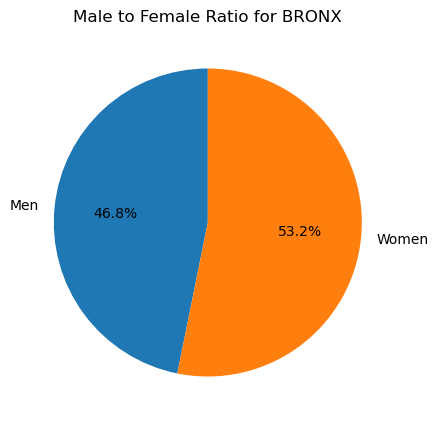

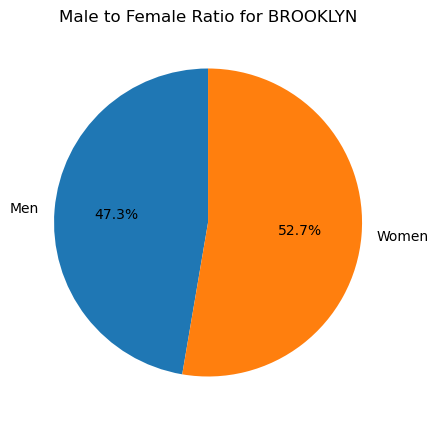

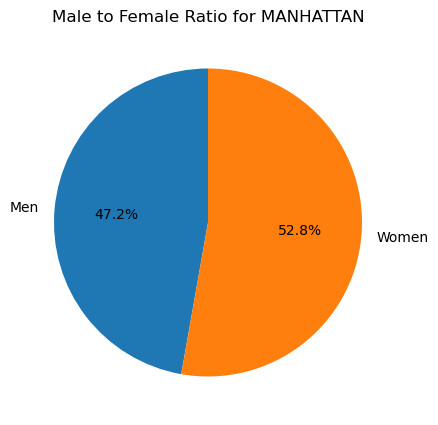

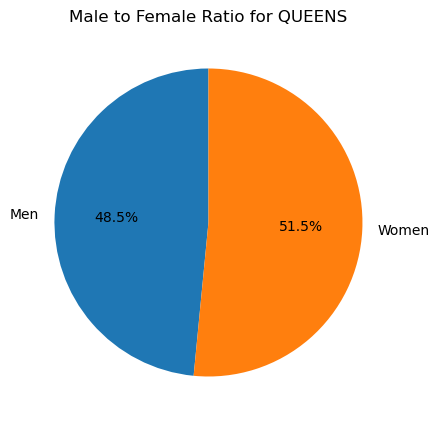

In [145]:
#women, white collar workers and people with higher income are more likely to show interest in this event and donate money. We should take these criteria to maximize donations.
for index, row in tri_borough_stats.iterrows():
    plt.figure(figsize=(5, 5))
    plt.pie([row['Men'], row['Women']], labels=['Men', 'Women'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Male to Female Ratio for {row["Borough"]}')
    plt.show()
#based on this, all boroughs are good to go as they all have more women. Now lets check white collars percentage, income and general population for these boroughs

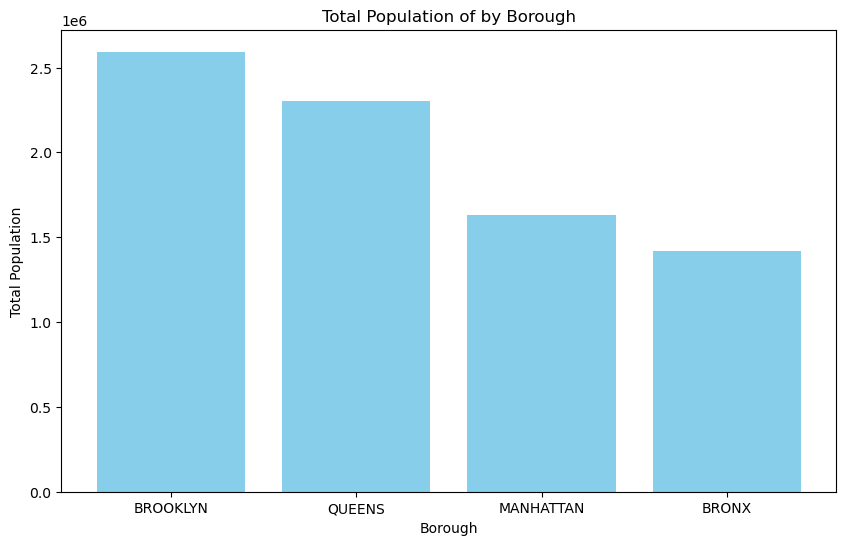

In [147]:
tri_borough_stats = tri_borough_stats.sort_values(by='TotalPop', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(tri_borough_stats['Borough'], tri_borough_stats['TotalPop'], color='skyblue')
ax.set_xlabel('Borough')
ax.set_ylabel('Total Population')
ax.set_title('Total Population of by Borough')

plt.show()
#Brooklyn has significantly more population.

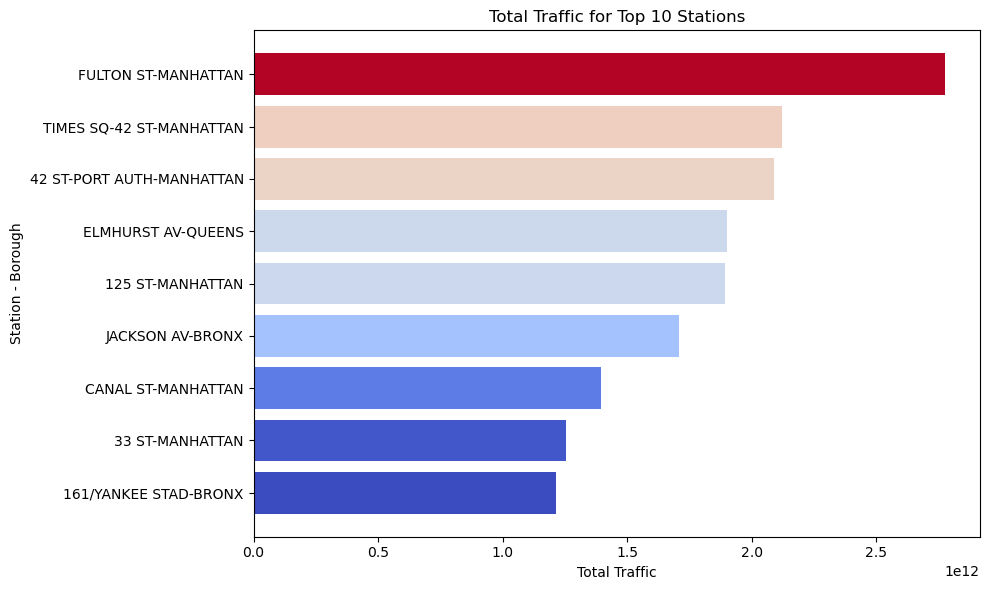

In [149]:
top_10_stations
top_10_stations['Station_Borough'] = top_10_stations['Station'] + '-' + top_10_stations['Borough']
top_10_stations

top_10_stations = top_10_stations[::-1]

cmap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=top_10_stations['Total Traffic'].min(), vmax=top_10_stations['Total Traffic'].max())
colors = [cmap(norm(value)) for value in top_10_stations['Total Traffic']]

plt.figure(figsize=(10, 6))
plt.barh(top_10_stations['Station_Borough'], top_10_stations['Total Traffic'], color=colors)
plt.xlabel('Total Traffic')
plt.ylabel('Station - Borough')
plt.title('Total Traffic for Top 10 Stations')
plt.tight_layout()
plt.show()
#most crowded stations. 7 out of 10 are in Manhattan area.

In [151]:
tri_borough_stats

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
1,BROOKLYN,2593160,1227027,1366133,27863.969251,21.550802,37.320989,24.286631,23.044519,6.480882,8.870722,20.701203,4.776203,8.722193,2.315909,3.705481,41.889572,9.985294
3,QUEENS,2300362,1114897,1185465,27603.473520,14.033178,32.338629,24.490031,24.296885,8.225857,10.648598,33.728816,6.568069,5.322586,1.479128,2.492056,42.898754,8.725389
2,MANHATTAN,1629431,769399,860032,69597.050179,17.676344,57.957706,14.725090,20.936559,2.098925,4.284946,6.280287,1.877419,21.569534,5.303943,6.909319,30.750896,7.732258
0,BRONX,1420173,665028,755145,19288.272727,29.775152,24.376061,33.177273,24.132424,7.186970,11.126061,22.983636,4.866364,8.135152,1.771515,3.342424,42.495758,13.869697


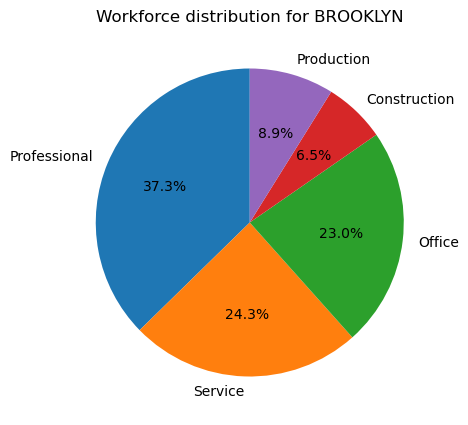

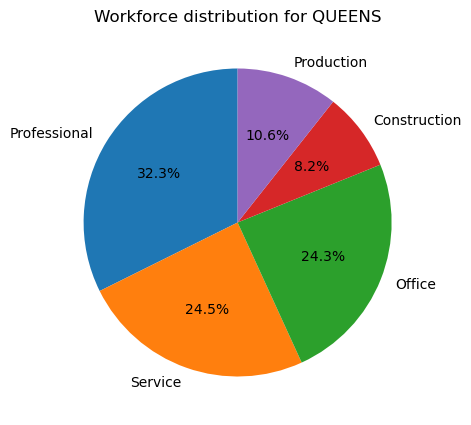

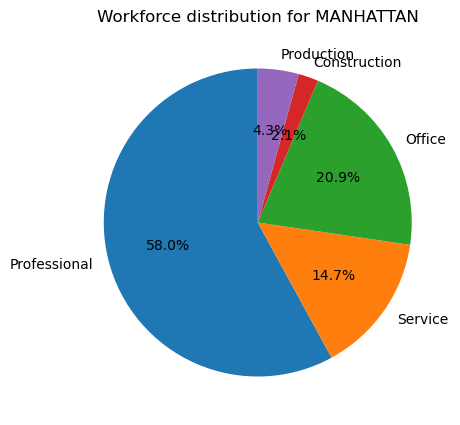

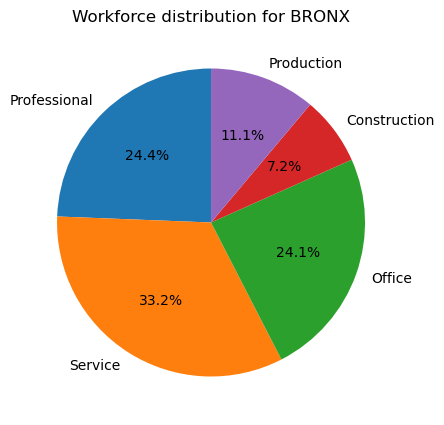

In [153]:
for index, row in tri_borough_stats.iterrows():
    plt.figure(figsize=(5, 5))
    plt.pie([row['Professional'], row['Service'], row['Office'], row['Construction'], row['Production']], labels=['Professional', 'Service','Office','Construction','Production'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Workforce distribution for {row["Borough"]}')
    plt.show()
    
#We assume white collars (professional + office) will be more interested. Manhattan and Brooklyn are in the front.

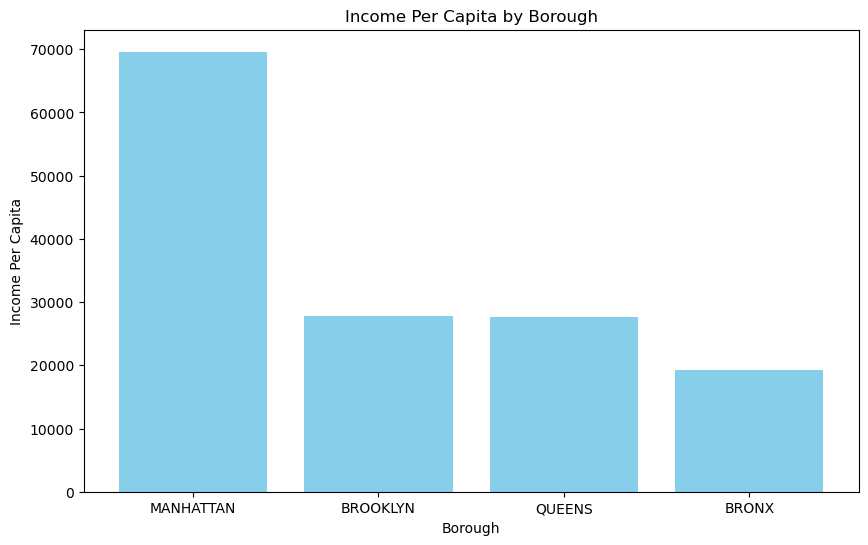

In [155]:
# Create a bar plot for Income Per Capita
tri_borough_stats = tri_borough_stats.sort_values(by='IncomePerCap', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(tri_borough_stats['Borough'], tri_borough_stats['IncomePerCap'], color='skyblue')
ax.set_xlabel('Borough')
ax.set_ylabel('Income Per Capita')
ax.set_title('Income Per Capita by Borough')

plt.show()
#Manhattan is significantly richer. Lets check what people use to commute. If they do not use cars often, we would be able to focus on Manhattan.

In [157]:
tri_borough_stats

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
2,MANHATTAN,1629431,769399,860032,69597.050179,17.676344,57.957706,14.725090,20.936559,2.098925,4.284946,6.280287,1.877419,21.569534,5.303943,6.909319,30.750896,7.732258
1,BROOKLYN,2593160,1227027,1366133,27863.969251,21.550802,37.320989,24.286631,23.044519,6.480882,8.870722,20.701203,4.776203,8.722193,2.315909,3.705481,41.889572,9.985294
3,QUEENS,2300362,1114897,1185465,27603.473520,14.033178,32.338629,24.490031,24.296885,8.225857,10.648598,33.728816,6.568069,5.322586,1.479128,2.492056,42.898754,8.725389
0,BRONX,1420173,665028,755145,19288.272727,29.775152,24.376061,33.177273,24.132424,7.186970,11.126061,22.983636,4.866364,8.135152,1.771515,3.342424,42.495758,13.869697


In [159]:
#lets take drivers out of the equation as they are much less likely to be at subway stations
tri_borough_stats['Driving Population'] = (tri_borough_stats['TotalPop']*(tri_borough_stats['Carpool']+tri_borough_stats['Drive']))/100
tri_borough_stats['Driving Population'] = tri_borough_stats['Driving Population'].round().astype(int)
tri_borough_stats['Not Driving Population'] = tri_borough_stats['TotalPop'] - tri_borough_stats['Driving Population']
tri_borough_stats['Not Driving Percentage'] = (tri_borough_stats['Not Driving Population'] / tri_borough_stats['TotalPop'])*100
tri_borough_stats['Driving Percentage'] = 100 - tri_borough_stats['Not Driving Percentage']

In [161]:
tri_borough_stats

,Borough,TotalPop,Men,Women,IncomePerCap,Poverty,Professional,Service,Office,Construction,...,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment,Driving Population,Not Driving Population,Not Driving Percentage,Driving Percentage
2,MANHATTAN,1629431,769399,860032,69597.050179,17.676344,57.957706,14.725090,20.936559,2.098925,...,1.877419,21.569534,5.303943,6.909319,30.750896,7.732258,132924,1496507,91.842306,8.157694
1,BROOKLYN,2593160,1227027,1366133,27863.969251,21.550802,37.320989,24.286631,23.044519,6.480882,...,4.776203,8.722193,2.315909,3.705481,41.889572,9.985294,660670,1932490,74.522590,25.477410
3,QUEENS,2300362,1114897,1185465,27603.473520,14.033178,32.338629,24.490031,24.296885,8.225857,...,6.568069,5.322586,1.479128,2.492056,42.898754,8.725389,926974,1373388,59.703125,40.296875
0,BRONX,1420173,665028,755145,19288.272727,29.775152,24.376061,33.177273,24.132424,7.186970,...,4.866364,8.135152,1.771515,3.342424,42.495758,13.869697,395518,1024655,72.150013,27.849987


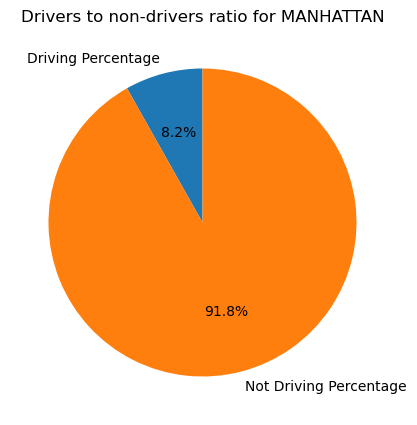

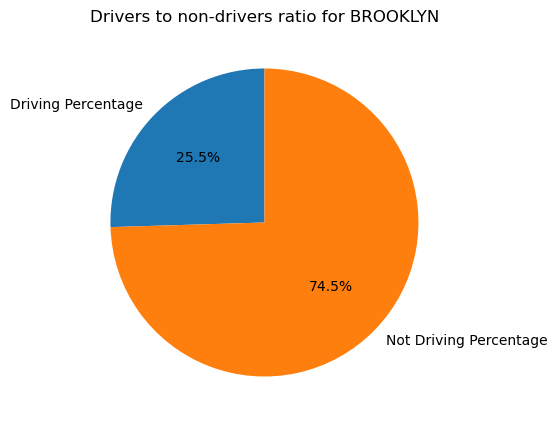

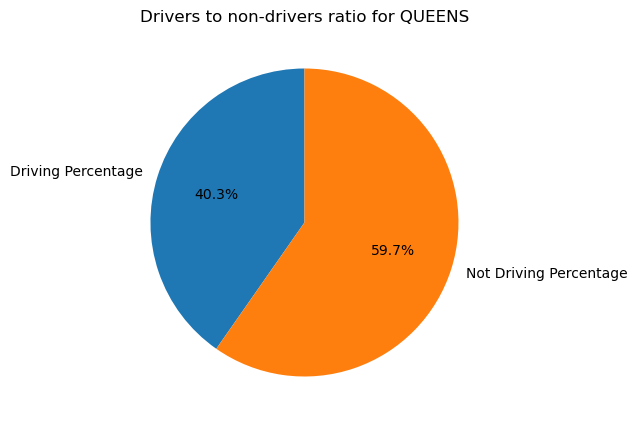

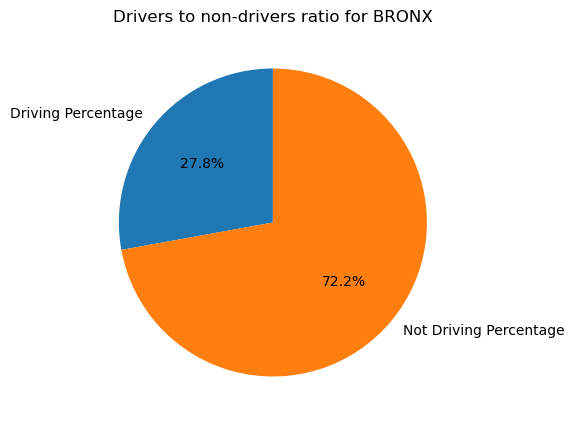

In [163]:
for index, row in tri_borough_stats.iterrows():
    plt.figure(figsize=(5, 5))
    plt.pie([row['Driving Percentage'], row['Not Driving Percentage']], labels=['Driving Percentage', 'Not Driving Percentage'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Drivers to non-drivers ratio for {row["Borough"]}')
    plt.show()

In [165]:
#Since Manhattan is population wise in the middle, contains 7 out of 10 most busy subway stations and have significantly hire white collars and much higher income per capita, focusing on Manhattan stations will be maximizing the donations and attendance#
top_10_stations.sort_values(by='Total Traffic', ascending=False, inplace=True)
top_10_stations

,Station,Borough,Total Traffic,Station_Borough
8,FULTON ST,MANHATTAN,2776752466837,FULTON ST-MANHATTAN
10,TIMES SQ-42 ST,MANHATTAN,2119189607511,TIMES SQ-42 ST-MANHATTAN
3,42 ST-PORT AUTH,MANHATTAN,2090444507614,42 ST-PORT AUTH-MANHATTAN
6,ELMHURST AV,QUEENS,1901200170552,ELMHURST AV-QUEENS
0,125 ST,MANHATTAN,1893688076404,125 ST-MANHATTAN
9,JACKSON AV,BRONX,1706839274514,JACKSON AV-BRONX
4,CANAL ST,MANHATTAN,1392645989483,CANAL ST-MANHATTAN
2,33 ST,MANHATTAN,1254025638632,33 ST-MANHATTAN
1,161/YANKEE STAD,BRONX,1215877565167,161/YANKEE STAD-BRONX


In [167]:
#FULTON ST-MANHATTAN
#TIMES SQ-42 ST-MANHATTAN
#42 ST-PORT AUTH-MANHATTAN
#ELMHURST AV-QUEENS
#125 ST-MANHATTAN